In [3]:
! python3 ~/ANTS/src3_detection/wp2_inference/ant_detection_yolo_bigNMS.py ~/data/videos_learning/20241018/20241018_1324_0000_00.mkv ~/data/videos_learning/20241018_1324_0000_00_yolo.txt ~/ANTS/models/detection/YOLOv8n_best_Marc.pt

Processing frame 1 / 0
Processing frame 5 / 0
Processing frame 10 / 0
Processing frame 25 / 0
Processing frame 50 / 0
Processing frame 100 / 0
Processing frame 200 / 0
Processing frame 300 / 0
Processing frame 400 / 0
Processing frame 500 / 0
Processing frame 600 / 0
Processing frame 700 / 0
Processing frame 800 / 0
Processing frame 900 / 0
Processing frame 1000 / 0
Processing frame 1100 / 0
Processing frame 1200 / 0
Processing frame 1300 / 0
Processing frame 1400 / 0
Processing frame 1500 / 0
Processing frame 1600 / 0
Processing frame 1700 / 0
Processing frame 1800 / 0
Processing frame 1900 / 0
Processing frame 2000 / 0
^C
Traceback (most recent call last):
  File "/home/ignasi/ANTS/src3_detection/wp2_inference/ant_detection_yolo_bigNMS.py", line 94, in <module>
    bboxes = detector_model(frame)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/home/ignasi/ANTS/src3_detection/wp2_inference/ant_detection_yolo_bigNMS.py", line 44, in detector_model
    results = detection_model(crops, imgsz=

### Check a good thereshold saving crops

In [1]:

th = 0.8

det_file = "/home/ignasi/data/videos_learning/20241018_1324_0000_00_yolo.txt"
video = "/home/ignasi/data/videos_learning/20241018/color_20241018_1324_0000_00.mkv"


import cv2

from ceab_ants.io.mot_loader import MOTLoader
from ceab_ants.io.video_contextmanager import VideoCapture


mot = MOTLoader(det_file)
with VideoCapture(video) as capture:
    for frame_num in range(100, min(10000, mot.system_last_frame), 200):
        capture.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        _, frame = capture.read()
        detections = mot(frame_num)

        high = detections[detections[:, 6] > th, ...]
        low = detections[detections[:, 6] <= th, ...]

        for i, det in enumerate(high):
            x = int(det[2])
            y = int(det[3])
            w = int(det[4])
            h = int(det[5])

            x1 = x - w // 2 - 10
            x2 = x + w // 2 + 10
            y1 = y - h // 2 - 10
            y2 = y + h // 2 + 10

            cv2.imwrite(f'./crops/high/{frame_num:09}_{i}.png', frame[ y1 : y2, x1 : x2])

        for i, det in enumerate(low):
            x = int(det[2])
            y = int(det[3])
            w = int(det[4])
            h = int(det[5])

            x1 = x - w // 2 - 10
            x2 = x + w // 2 + 10
            y1 = y - h // 2 - 10
            y2 = y + h // 2 + 10

            cv2.imwrite(f'./crops/low/{frame_num:09}_{i}.png', frame[ y1 : y2, x1 : x2])


### See Static trajectories

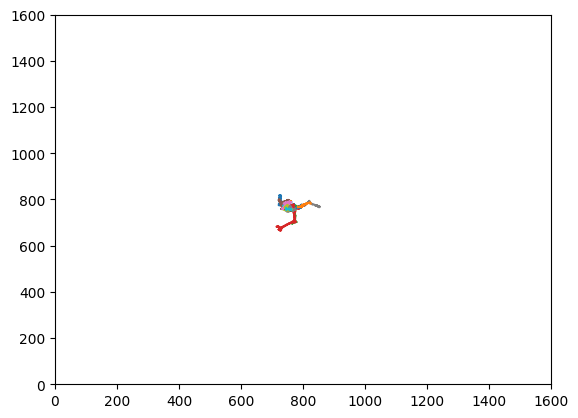

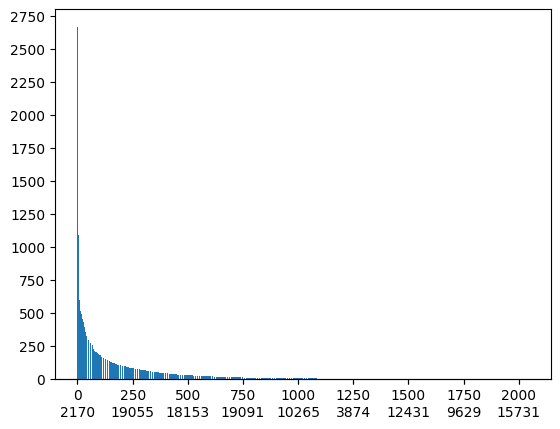

In [35]:

from matplotlib import pyplot as plt
import pandas as pd


seq_path = '~/data/results_video_pol/yolo_x264_stack_20240626_PINK_COLORS_2/20240626_1554_trk_world.txt'
offset = 1
batch_size = 50
batch_num = 0

tracks = pd.read_csv(seq_path, header=None, names=['fr', 'id', 'x', 'y', 'w', 'h', 'conf', 'a', 'b', 'c', 'angle'])

for i in tracks.id.value_counts().index[offset + batch_size * (batch_num) : offset + batch_size * (batch_num + 1)]:
    plt.plot(tracks.x.loc[tracks.id == i], tracks.y.loc[tracks.id == i])
plt.xlim(0, 1600)
plt.ylim(0, 1600)
plt.show()

plt.bar(range(len(tracks.id.value_counts())), tracks.id.value_counts().values)
plt.gca().set_yticks(range(0, 3000, 250))
plt.gca().secondary_xaxis(location=0)
plt.gca().set_xticks(plt.gca().get_xticks()[1:-1], labels=[f'\n{tracks.id.value_counts().index[int(n)]}' for n in plt.gca().get_xticks()[1:-1]])
plt.show()

#first = 250
#plt.bar(range(len(tracks.id.value_counts()))[:first], tracks.id.value_counts().values[:first])
#plt.gca().set_yticks(range(0, 3000, 250))
#plt.gca().secondary_xaxis(location=0)
#plt.gca().set_xticks(plt.gca().get_xticks()[1:-1], labels=[f'\n{tracks.id.value_counts().index[int(n)]}' for n in plt.gca().get_xticks()[1:-1]])
#plt.show()

